In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv

Pre-Installed Python Packages Installed into the notebook

In [2]:
dataset_location = "datasets/NewImpact.txt"

def read_in_dataset(file_loc):

  with open(file_loc, "r") as infile:
    dataset = infile.read().split(",")
    num_clicks_per_minute = np.array([int(float(x)) for x in dataset if x != " "])

    return num_clicks_per_minute

num_clicks_per_minute = read_in_dataset(dataset_location)

print(num_clicks_per_minute[:75])

[77 77 78 80 79 81 78 80 76 77 78 76 80 78 77 79 79 78 56 54 57 56 58 54
 55 55 47 52 48 47 40 41 39 39 43 42 46 46 45 57 54 55 55 62 55 60 50 56
 55 59 64 61 66 66 68 70 59 68]


Setting the Working Directory for the Notebook, here we take the rebound angles from our tests and extract them from the text file. Here we have to make sure all the values are integers, so we use the float() function for that, and then print out the values. 

In [3]:
def bin_data(dataset, lower_bound, upper_bound, num_bins):

  # Define your bin edges here
  bin_edges = np.linspace(lower_bound, upper_bound, num_bins)
  bin_width = bin_edges[10] - bin_edges[0]

  # Calculate the center positions of each bin (this will be helpful later!)
  bin_centers = 0.5*(bin_edges[10:] + bin_edges[:-10])

  # Define a dictionary here
  binned_data = {}

  for left_edge_i in bin_edges[:-10]:
    binned_data[left_edge_i] = 0

  # Bin the data
  for data_point in dataset:
    for left_edge_i in bin_edges[:-10]:
      if (data_point >= left_edge_i) and ( data_point < left_edge_i + bin_width):
        binned_data[left_edge_i] += 10

  return binned_data, bin_edges, bin_centers


clicks_per_minute_binned, clicks_per_minute_bin_edges, clicks_per_minute_bin_centers = bin_data(num_clicks_per_minute, -1, 69.5, 70)



Setting the parameters for Bin Width, Centers, etc. Here the date is larger so we have to increase the binwidth by a power of 10.

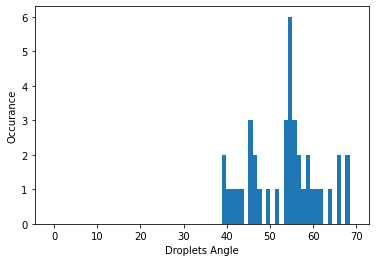

In [9]:
plt.figure()
plt.hist(num_clicks_per_minute, bins = clicks_per_minute_bin_edges)
plt.xlabel("Droplets Angle")
plt.ylabel("Occurance")
plt.show()

Test Histogram of the Rebound Droplet Angles with their frequency of occurance. Shown that most angles are greater than 60, but a few outliers remain, indicating that the outlier may have an affect on the data. 

In [5]:
n_i, bins = np.histogram(num_clicks_per_minute, clicks_per_minute_bin_edges, density = False)

def gaussian(n, mu, sigma, N):

  return [N*(1.0/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x-mu)**2/sigma**2) for x in n]


Functions defining the Gaussian Curve

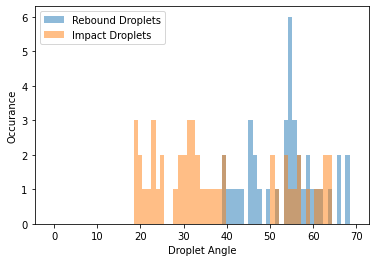

In [6]:
dataset_location_2 = "datasets/NewRebound.txt"

num_clicks_per_minute_2 = read_in_dataset(dataset_location_2)

#popt_gaussian, pcov_gaussian = curve_fit(gaussian, clicks_per_minute_bin_centers, n_i, p0 = [ 100, 100, 100])

plt.figure()
plt.hist(num_clicks_per_minute, bins = clicks_per_minute_bin_edges, alpha = 0.5, density = False, label = "Rebound Droplets")
plt.hist(num_clicks_per_minute_2, bins = clicks_per_minute_bin_edges, alpha = 0.5, density = False, label = "Impact Droplets")
plt.legend()
plt.xlabel("Droplet Angle")
plt.ylabel("Occurance")
plt.show()


Two Histograms have some overlap, at places indicating that is where the rebound and impact angles have the smae value, given the expirment, it is possible that the overlapping values are from different wall placements 